In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.linear_model as lm
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Parte 1**

## **DATASET**

Para a parte 1 do processo trainee será analisado um Dataset com informações sobre 1987 clientes que compraram ou não determinado serviço de seguro de viagem.

No Dataset são apresentadas diversas informações a respeito dos clientes, informações como idade, Número de Familiares, histórico de doenças crônicas, Salário Anual, Categoria de emprego, e histórico de viagens.

Assim podemos verificar quais dessas características influenciam mais na decisão de fechar o pacote de seguro de viagem.


In [3]:
DrivePath1 = '/content/drive/My Drive/CIS/Trainee/part1/travelinsurance.csv'

seguro = pd.read_csv(DrivePath1)

In [4]:
#Tratando o Dataset para melhor visualização 

seguro=seguro.dropna()
seguro=seguro.drop(columns=['Unnamed: 0'])                        #retirada de coluna não significante 

seguro=seguro.rename(columns={'Age':'Idade','Employment Type':'Emprego','GraduateOrNot':'Graduado','AnnualIncome':'Salário Anual','FamilyMembers':'Familiares','ChronicDiseases':'Doenças Crônicas','FrequentFlyer':'Viaja Frequentemente','EverTravelledAbroad':'Viajou Para o Exterior','TravelInsurance':'Comprou o seguro'})

#Mudando variaveis strings para valores booleanos para facilitar as análises de correlação,onde

seguro=seguro.replace('Yes',1)                                    #1 representa "SIM"
seguro=seguro.replace('No',0)                                     #0 representa "NÃO"

seguro=seguro.replace('Government Sector', 0)                     #0 representa nessa coluna pessoas que trabalham para o setor público
seguro=seguro.replace('Private Sector/Self Employed',1)           #1 representa nessa coluna pessoas que trabalham para o setor privado
seguro


,Idade,Emprego,Graduado,Salário Anual,Familiares,Doenças Crônicas,Viaja Frequentemente,Viajou Para o Exterior,Comprou o seguro
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


## **Análises**

###**Primeiras Análises**



---


Para uma melhor familiarização com o Dataset podemos analisar algumas das
características das pessoas cujos dados foram coletados.

  Primeiro podemos visualizar por meio de um gráfico de contagem que o número de pessoas que compraram o pacote corresponde a um pouco mais da metade das pessoas que não compraram. 


---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



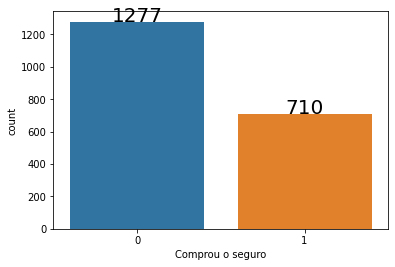

In [5]:
graf=sns.countplot(seguro['Comprou o seguro'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()



---


Podemos notar também que a faixa etária das pessoas analisadas fica entre os 25 e 35 anos com uma maior presença de pessoas com 28 anos. Assim temos a presença de pessoas no início de sua vida adulta provavelmente organizando suas primeiras viagens. 


---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



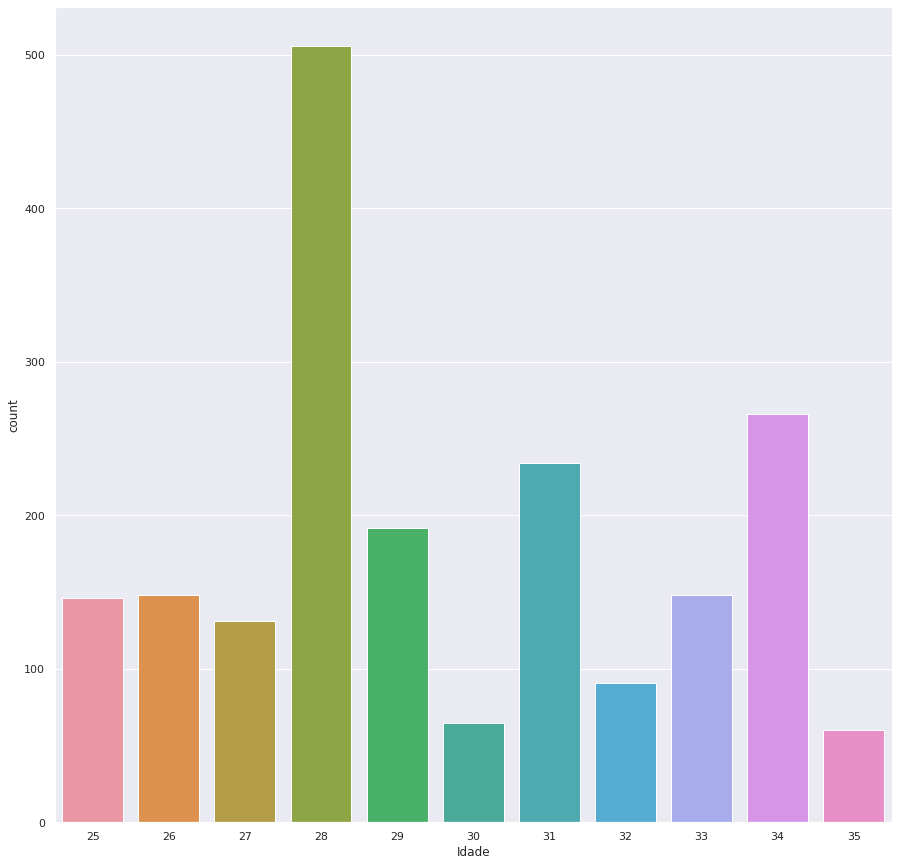

In [6]:
sns.countplot(seguro['Idade'])
sns.set(rc={'figure.figsize':(15,15)})



---


Vemos com o Histograma abaixo que o salário anual das pessoas analisadas fica entre 30.000 dólares e 180.000 dólares. Notamos também que a distribuição entre os valores é feita de maneira igualitária onde não temos muita discrepância entre a quantidade de pessoas com maior e menor poder aquisitivo. 


---



salário mínimo: 300000
salário máximo: 1800000


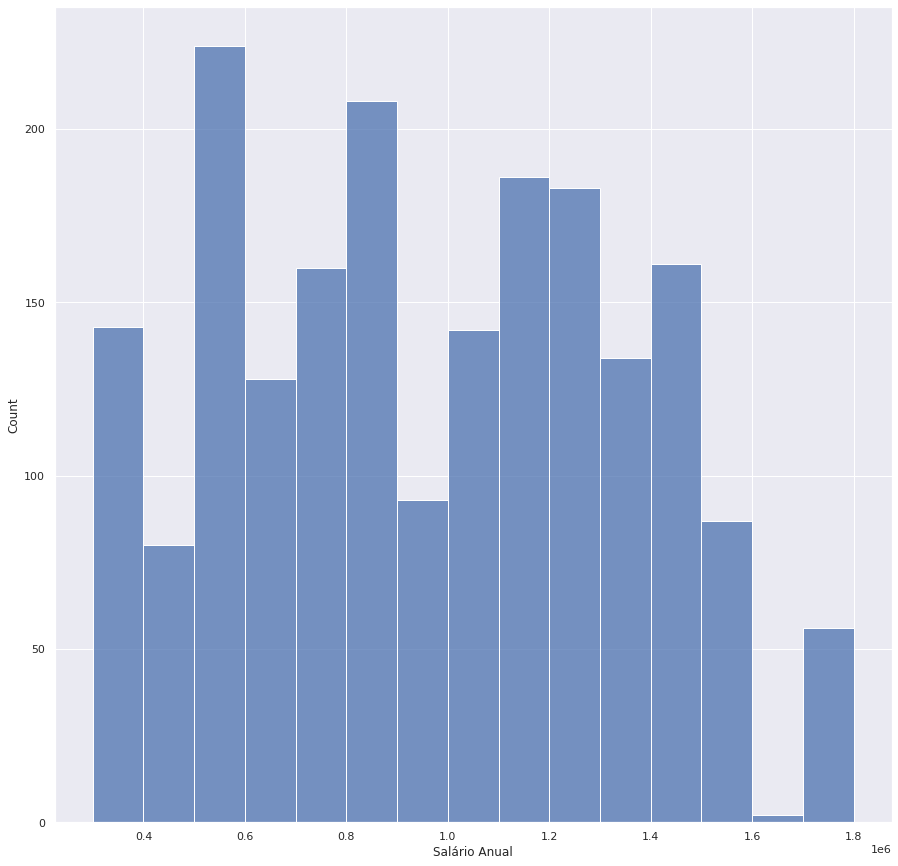

In [7]:

sns.histplot(seguro['Salário Anual'])
sns.set(rc={'figure.figsize':(15,15)})



print('salário mínimo: %d' %(seguro['Salário Anual'].min()))
print('salário máximo: %d' %(seguro['Salário Anual'].max()))

### **Habito de Viajar**



---


Como primeiro parâmetro a ser analisado, olharemos paras os parâmetros que dizem a respeito do histórico de viagens, sendo eles as colunas, ‘Viajou Para o Exterior’ e Viaja Frequentemente. Assim podemos verificar o impacto de tais parâmetros na decisão da compra do pacote de seguro de viagens.


---



In [8]:
#Correlação entre o habito de viajar frequentemente e a aquisição do pacote

correl=seguro['Viaja Frequentemente'].corr(seguro['Comprou o seguro'])
correl

0.23210307798965535

In [9]:
#Correlação entre o habito de viajar para o exterior e a aquisição do pacote

correl=seguro['Viajou Para o Exterior'].corr(seguro['Comprou o seguro'])
correl

0.43318257545456224



---


Notamos que o Viagem para o exterior impacta mais para a decisão do que viajar frequentemente. Podemos justificar isso pelo fato de que é mais difícil achar atendimento médico em outro país sendo mais recomendado a aquisição do pacote para viagens para exterior.


---





---


A baixa correlação para viajantes frequentes pode ser justificada também pois 
com mais experiencias em viagens, os viajantes ficam mais preparados para lidar com eventuais problemas na viagem necessitando menos de um pacote de seguro de viagens.

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



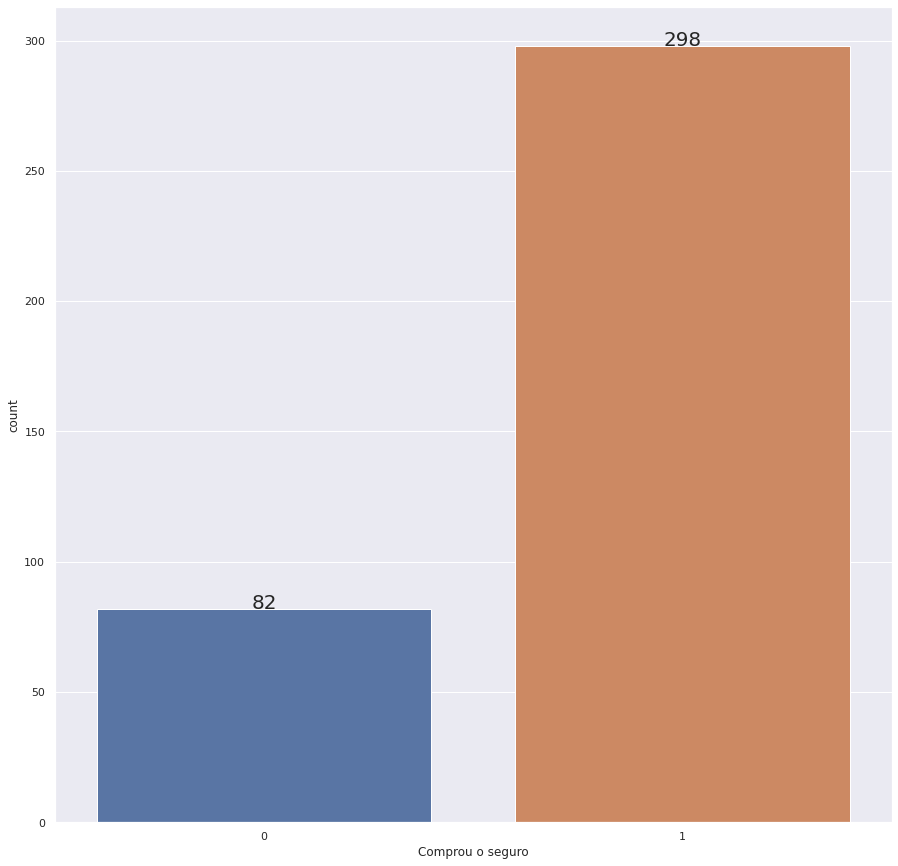

Porcentagem: 78.421053


In [10]:
#Comparação da quantidade de aquisoções do pacote entre as pessoas que viajaram para o exterior

VEMask=seguro['Viajou Para o Exterior']==1
VE=seguro[VEMask]

VEMask=VE['Comprou o seguro']==1
VEC=VE[VEMask]




graf=sns.countplot(VE['Comprou o seguro'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()


print('Porcentagem: %f' %((VEC.shape[0]/VE.shape[0])*100))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



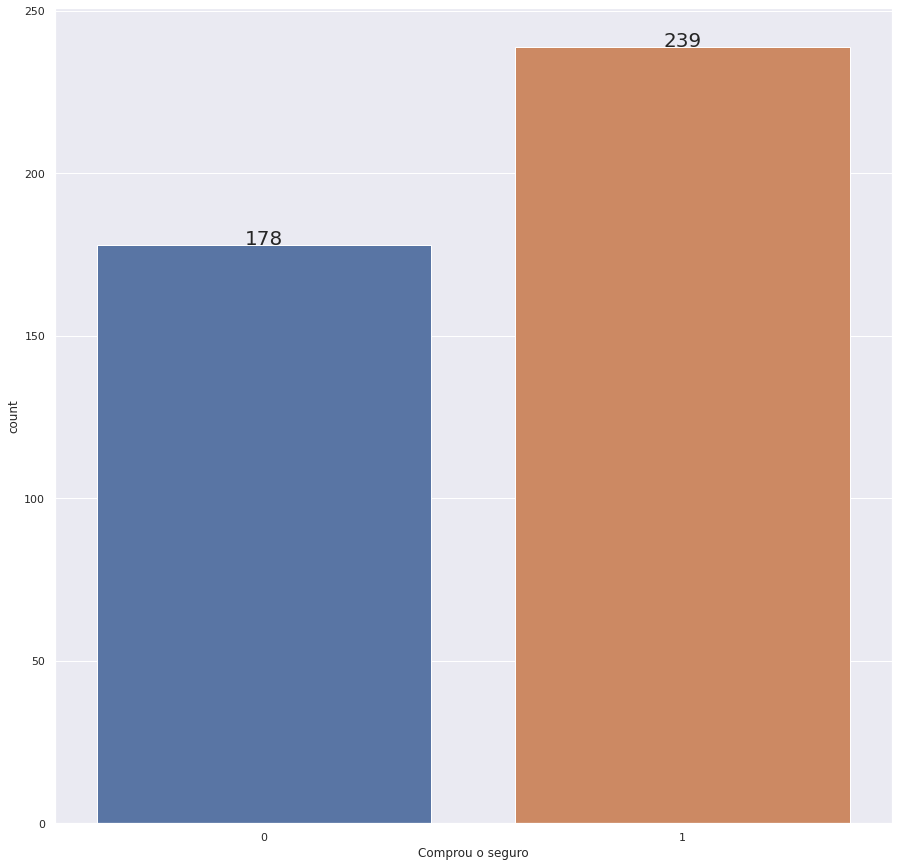

Porcentagem: 57.314149


In [11]:
#Comparação da quantidade de aquisoções do pacote entre as pessoas que viajam frequentemente

VFMask=seguro['Viaja Frequentemente']==1
VF=seguro[VFMask]

VFMask=VF['Comprou o seguro']==1
VFC=VF[VFMask]


graf=sns.countplot(VF['Comprou o seguro'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()
print('Porcentagem: %f' %((VFC.shape[0]/VF.shape[0])*100))



---


Notamos assim que 78% das pessoas que já viajaram para o exterior compraram o pacote,pois sabem da nescessidade de tal pacote para uma viagem para o exteriror,Enquanto 57% das pessoas que viajam frquentemente compraram o pacote, mostrando que Viajar para o exteriror tem uma influencia maior na compra do pacote.


---








###**Financeiro**



---


Para as análises relacionadas a situação financeira, verificaremos a influencia do salário anual na decisão da compra do pacote de seguro, Analisaremos também o impacto da escolaridade e área de atuação no salário anual.


---



In [12]:
#Correlação entre o salário Anual e a aquisição do pacote

correl=seguro['Salário Anual'].corr(seguro['Comprou o seguro'])
correl

0.3967632042790907

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



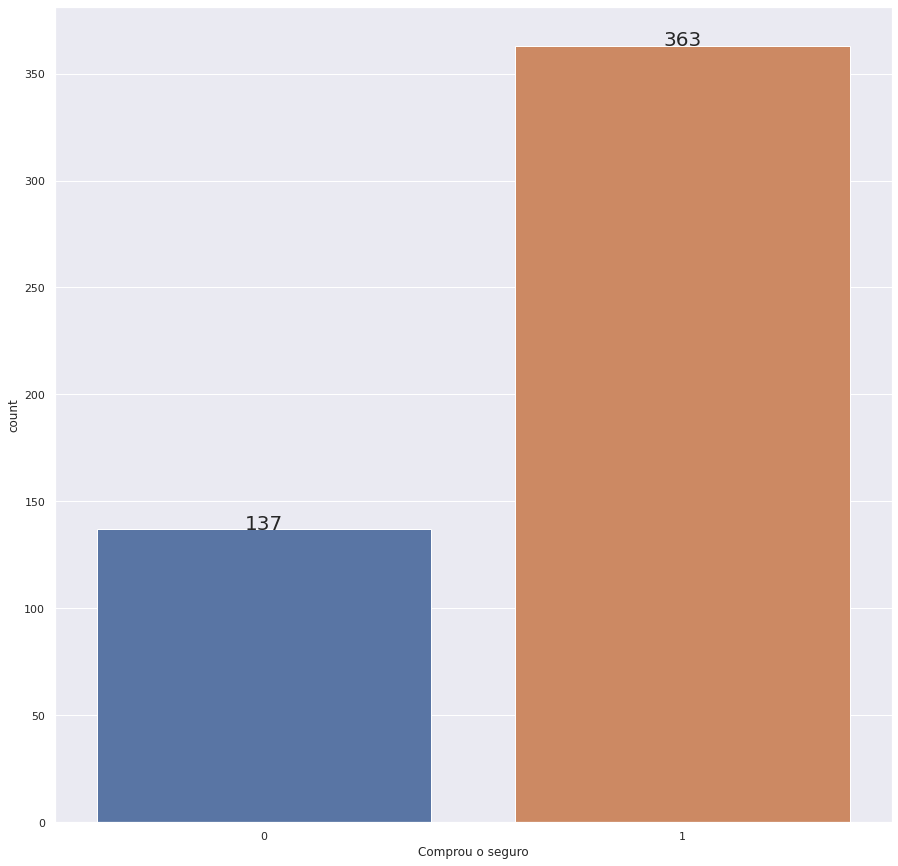

In [13]:
#Comparação da quantidade de aquisoções do pacote entre as 500 pessoas mais ricas

seguro_salario=seguro.sort_values(['Salário Anual'])
mais_ricos=seguro_salario[1487:1987]
mais_ricos




graf=sns.countplot(mais_ricos['Comprou o seguro'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



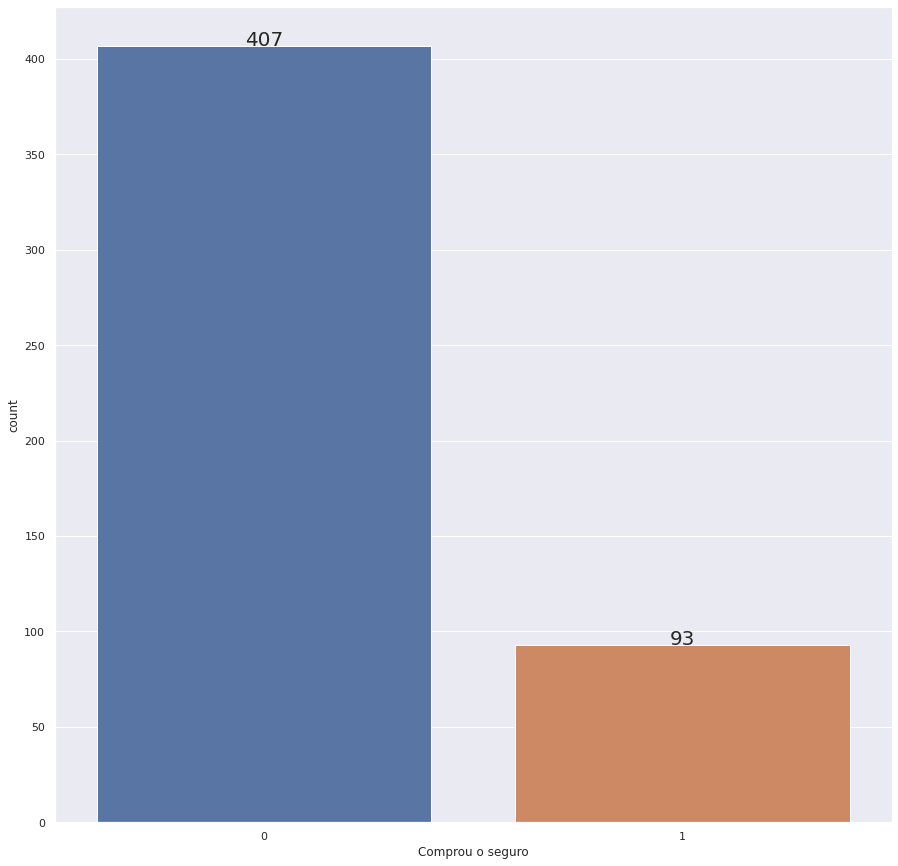

In [14]:

#Comparação da quantidade de aquisoções do pacote entre as 500 pessoas mais pobres

menos_ricos=seguro_salario[:500]
menos_ricos




graf=sns.countplot(menos_ricos['Comprou o seguro'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()



---


Notamos aqui a grande influencia do salário na compra do pacote onde entre as 500 pessoas mais pobres 81% não comprou o pacote e entre as 500 pessoa com maior poder aquisitivo, 72% adquiriu o pacote, isso acontece devido a razões obvias, quanto maior seu poder aquisitivo maior a chance de você ter dinheiro o suficiente para gastar com um pacote de seguro para viagens.


---



In [15]:
#Correlação entre o salário Anual e o habito de Viajar para o exterior

correl=seguro['Salário Anual'].corr(seguro['Viajou Para o Exterior'])
correl



0.4860426351624539

In [16]:
#Correlação entre o salário Anual e o habito de viajar frequentemente

correl=seguro['Salário Anual'].corr(seguro['Viaja Frequentemente'])
correl

0.35308672134124547

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



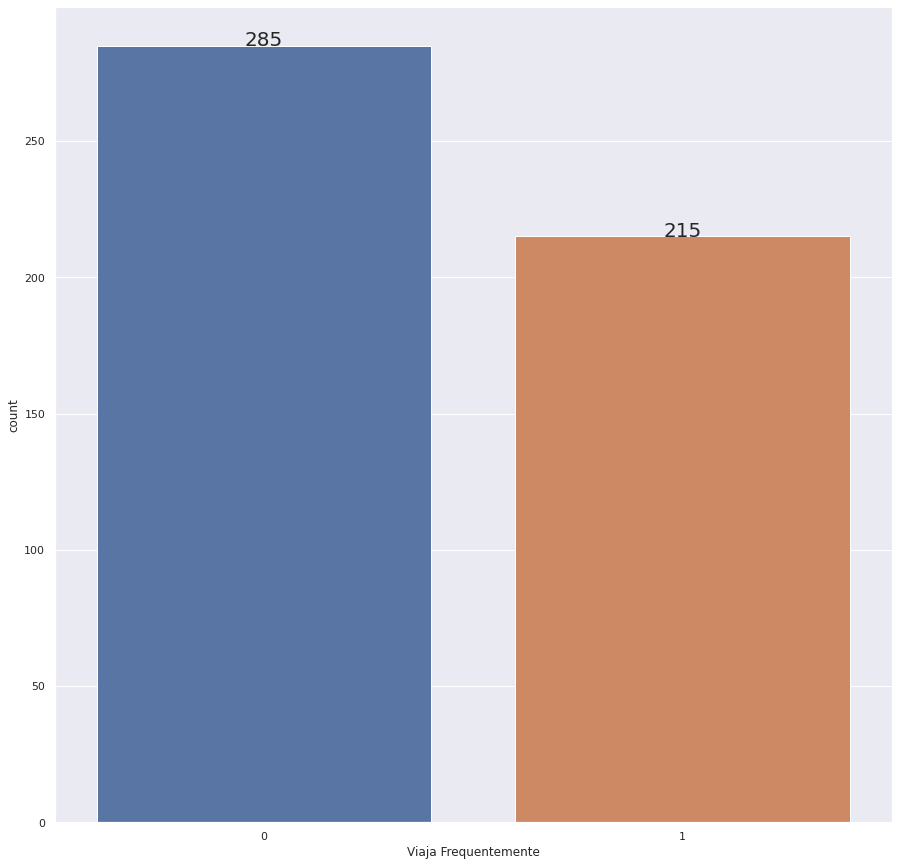

In [17]:
#Comparação do habito de viajar frequentemente entre as 500 pessoas mais ricas

graf=sns.countplot(mais_ricos['Viaja Frequentemente'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



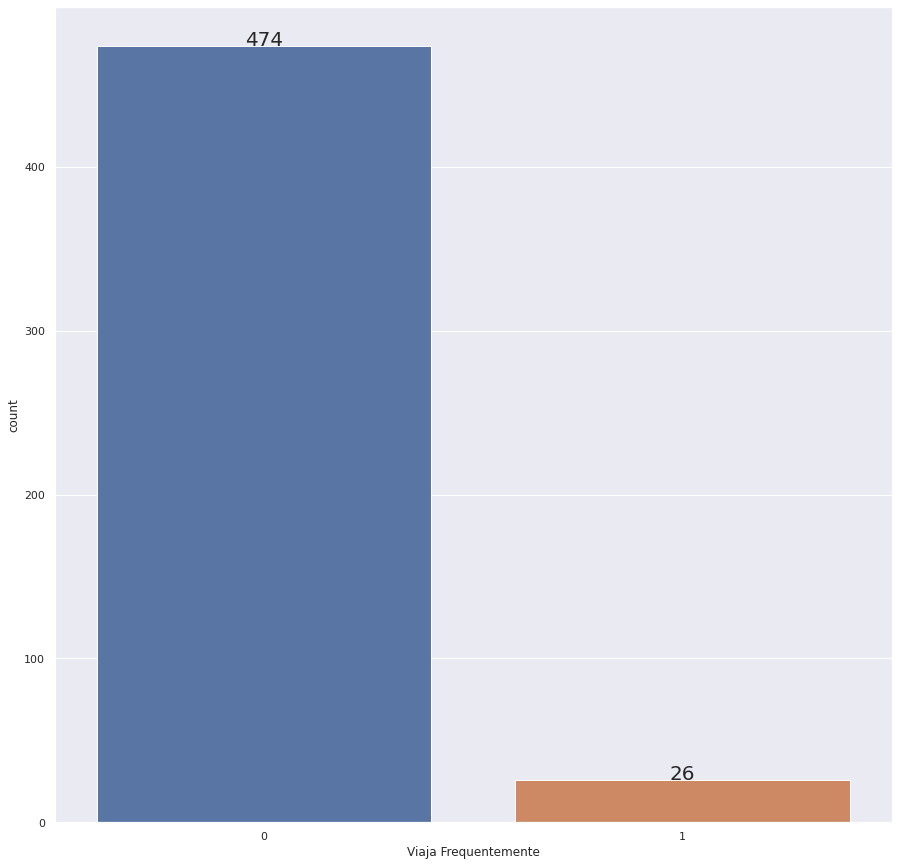

In [18]:
#Comparação do habito de viajar frequentemente entre as 500 pessoas mais pobres

graf=sns.countplot(menos_ricos['Viaja Frequentemente'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



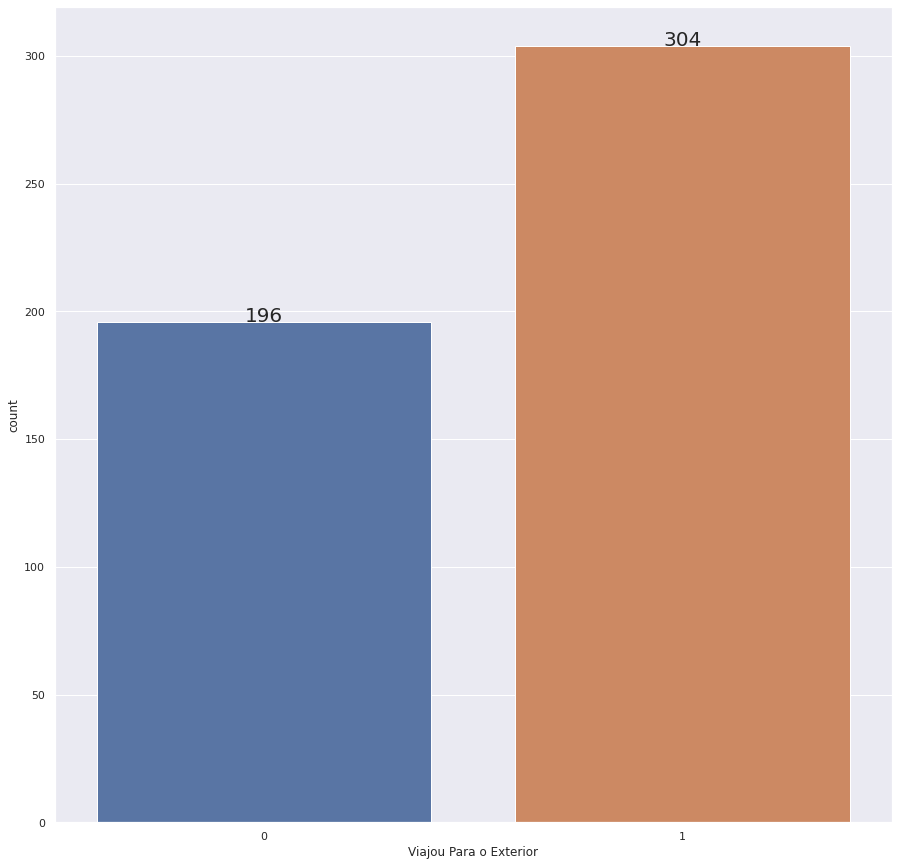

In [19]:
#Comparação do habito de viajar para o exterior entre as 500 pessoas mais ricas

graf=sns.countplot(mais_ricos['Viajou Para o Exterior'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



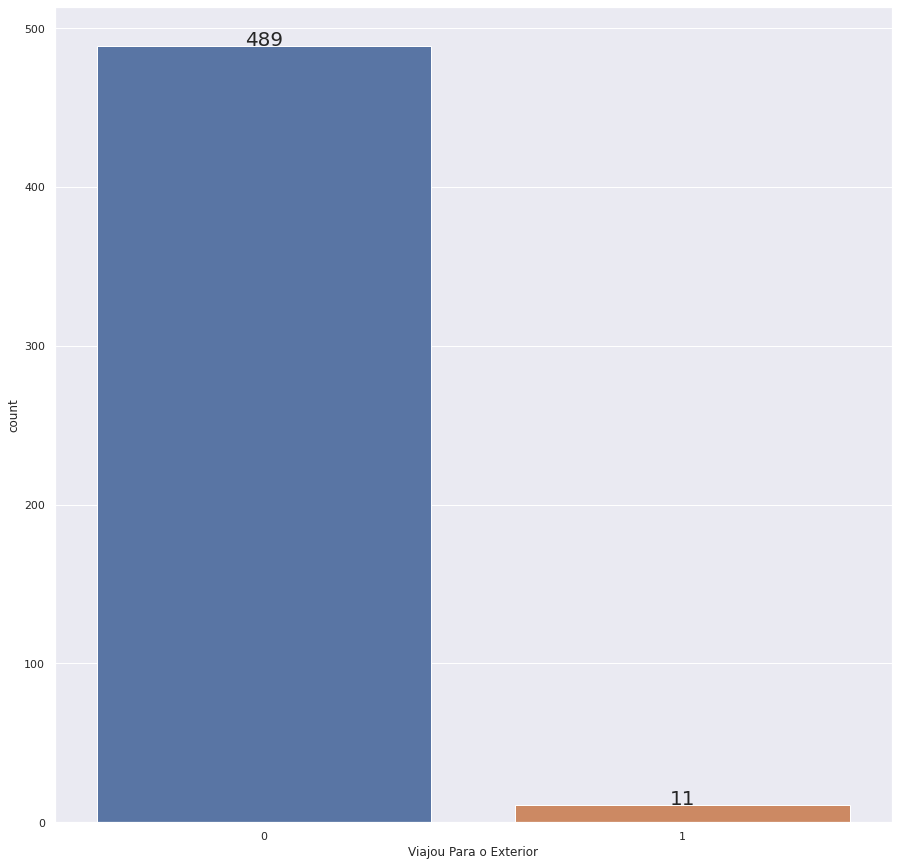

In [20]:
#Comparação do habito de viajar para o exterior entre as 500 pessoas mais pobres

graf=sns.countplot(menos_ricos['Viajou Para o Exterior'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()



---


Notamos a clara influencia do salário no hábito de viajar, vimos que pessoas entre as 500 pessoas com menor poder aquisitivo mais de 90% não possui o hábito de viajar frequentemente ou viajar para o exterior. Porém é interessante notar que não necessariamente pessoas com maior poder aquisitivo apresentam hábitos de viajar onde mias da metade não viaja frequentemente, devido a diversos fatores como falta de tempo a afinidade com o ato de viajar. Assim  salário Anual não funciona como um indicador para o habito de viajar e sim como uma barreira, impedindo pessoas com menor poder aquisitivo a adquirir o habito de viajar frequentemente ou para o exterior. 


---





---


De mesma maneira podemos analisar a influencia da graduação e da Area de 
atuação no salário anual de um individuo.

---



In [21]:
#Correlação entre o salário Anual e a graduação

correl=seguro['Salário Anual'].corr(seguro['Graduado'])
correl

0.10806586483580925

In [22]:
#Correlação entre o salário Anual e a Área de atuação


correl=seguro['Salário Anual'].corr(seguro['Emprego'])
correl

0.3491570330097054

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



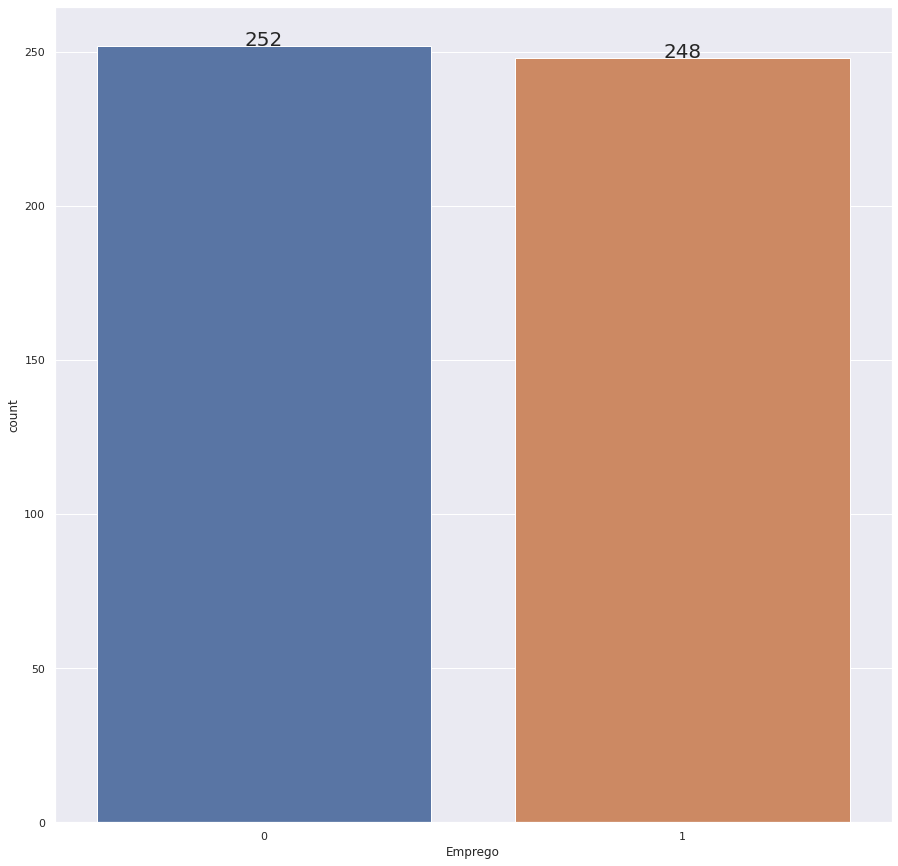

In [23]:
#Comparação da área de atuação entre as 500 pessoas mais pobres

graf=sns.countplot(menos_ricos['Emprego'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



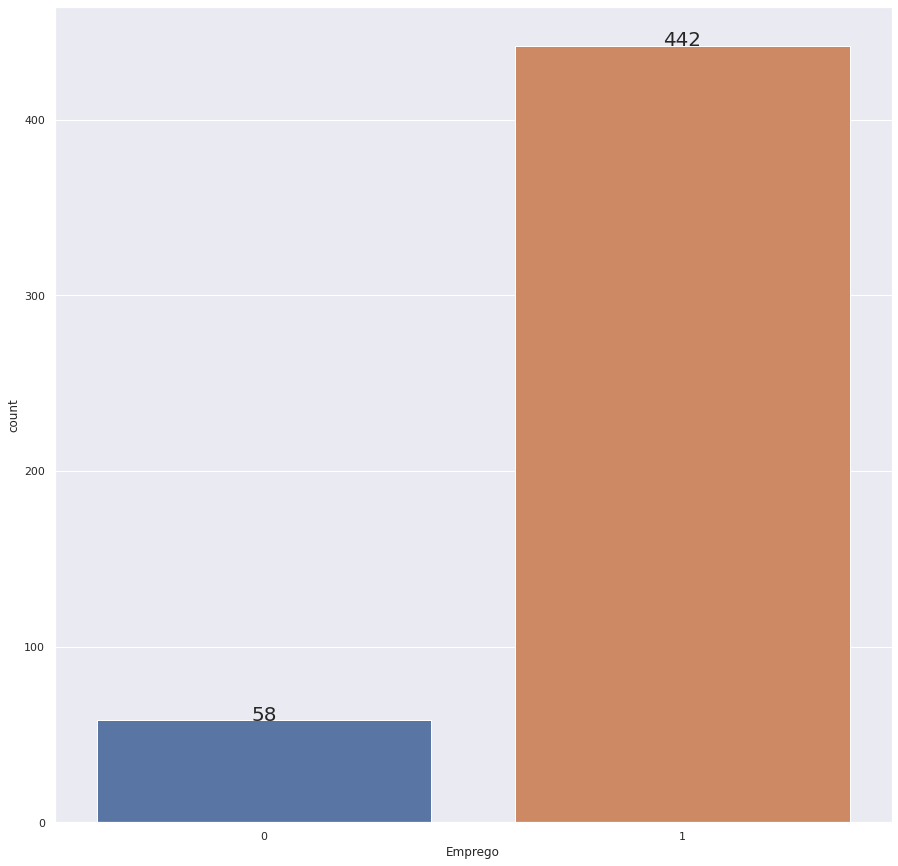

In [24]:
#Comparação da área de atuação entre as 500 pessoas mais ricas

graf=sns.countplot(mais_ricos['Emprego'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



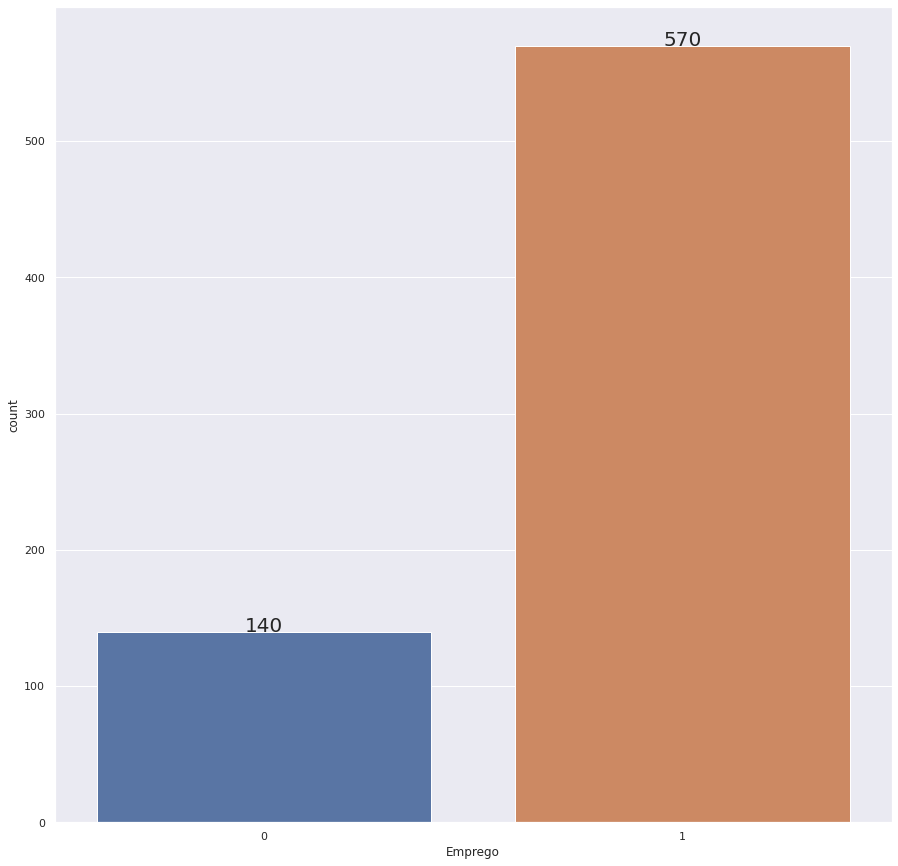

In [25]:
#Comparação da área de atuação entre as pessoas que adquiriram o pacote.


m=seguro['Comprou o seguro']==1
m=seguro[m]



graf=sns.countplot(m['Emprego'])
for i in graf.patches:
  graf.annotate(round(i.get_height(),3),(i.get_x()+ i.get_width() /2,i.get_height()),ha='center',va='baseline',fontsize=20)         #loop para colocar os valores nos topos da barra arrendondados até a 3 casa decimal
sns.set(rc={'figure.figsize':(15,15)})
plt.show()



---


Vemos que nos dias de hoje um diploma não garante e nem desautoriza um alto 
poder aquisitivo mostrado isso pela baixa correlação entre as colunas ‘Graduado’ e ‘salário Anual. Assim notamos que entre as pessoas com menor poder aquisitivo não existe desigualdade entre os setores, porém as pessoas com maior poder aquisitivo vêm do setor privado. Por fim podemos ver a influência da Área de atuação na compra do pacote, onde o de todas as pessoas que compraram o pacote 80% está no setor privado.

---



### **Doenças Crônicas**



---


Por últimos temos a analisar a influencia de histórico de doenças crônicas na aquisição do pacote.

---



In [26]:
#Correlação entre o histórico de doenças crônicas e a aquisição do pacote

correl=seguro['Doenças Crônicas'].corr(seguro['Comprou o seguro'])
correl

0.018189611220244314

In [27]:
#Comparação entre pessoas sem histórico de doenças crônicas e a aquisição do pacote


Sem_doenca=seguro['Doenças Crônicas']==0
SD=seguro[Sem_doenca]

Mask1=SD['Comprou o seguro']==1
SDC=SD[Mask1]


print('Porcentagem: %f' %((SDC.shape[0]/SD.shape[0])*100))

Porcentagem: 35.191638


In [28]:
#Comparação entre pessoas com histórico de doenças crônicas e a aquisição do pacote


Com_doenca=seguro['Doenças Crônicas']==1

CD=seguro[Com_doenca]

Mask1=CD['Comprou o seguro']==1
CDC=CD[Mask1]


print('Porcentagem: %f' %((CDC.shape[0]/CD.shape[0])*100))

Porcentagem: 37.137681




---


Notamos que para ambos os casos a porcentagem de pessoas que adquiriram o pacote segue a porcentagem normal de pessoas que adquiriram o pacote girando em torno de 30% mostrando assim quase nenhuma influencia na decisão acerca da aquisição do pacote. 

---



In [29]:
seguro

,Idade,Emprego,Graduado,Salário Anual,Familiares,Doenças Crônicas,Viaja Frequentemente,Viajou Para o Exterior,Comprou o seguro
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


# **Parte 2**

##**Pré Processamento**

In [30]:
#Baixando o Dataset e limpoando colunas desnecessárias e dados repetidos e nulos

DrivePathc= '/content/drive/My Drive/CIS/Trainee/data.csv'

cancer = pd.read_csv(DrivePathc)




cancer=cancer.replace('B',1)
cancer=cancer.replace('M',0)       #One Hot Encoding



cancer=cancer.drop(columns=['Unnamed: 32','id'])



cancer=cancer.dropna()
cancer=cancer.drop_duplicates()



cancer=cancer.reset_index()
cancer

,index,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
#Baixando o Dataset e limpoando colunas desnecessárias e dados repetidos ou nulos 

DrivePathLM = '/content/drive/My Drive/CIS/Trainee/1000_Companies.csv'

DF = pd.read_csv(DrivePathLM)

#DF=DF.dropna()
DF=DF.replace('New York',0)
DF=DF.replace('California',1)       #One Hot Encoding
DF=DF.replace('Florida',2)

DF=DF.drop_duplicates()
DF=DF.dropna()



DF=DF.drop_duplicates()
DF=DF.reset_index()



DF


,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.800,471784.1000,0,192261.83000
1,1,162597.70,151377.590,443898.5300,1,191792.06000
2,2,153441.51,101145.550,407934.5400,2,191050.39000
3,3,144372.41,118671.850,383199.6200,0,182901.99000
4,4,142107.34,91391.770,366168.4200,2,166187.94000
...,...,...,...,...,...,...
994,995,54135.00,118451.999,173232.6695,1,95279.96251
995,996,134970.00,130390.080,329204.0228,1,164336.60550
996,997,100275.47,241926.310,227142.8200,1,413956.48000
997,998,128456.23,321652.140,281692.3200,1,333962.19000


In [32]:
#Baixando o Dataset e retirando dados nulos e subtituindo pela média

DrivePathdia = '/content/drive/My Drive/CIS/Trainee/diabetes2.csv'

Diabetes = pd.read_csv(DrivePathdia)
Diabetess=Diabetes.dropna()
Diabetes=Diabetes.drop_duplicates()


Masc=Diabetes['BloodPressure']!=0
Masc1=Diabetes['SkinThickness']!=0
Masc2=Diabetes['Insulin']!=0
Masc3=Diabetes['BMI']!=0
Masc4=Diabetes['Glucose']!=0


Diabetess=Diabetes[Masc]

Diabetess=Diabetess[Masc1]

Diabetess=Diabetess[Masc2]

Diabetess=Diabetess[Masc3]

Diabetess=Diabetess[Masc4]



Diabetes.loc[Diabetes.Glucose==0,'Glucose']=Diabetess['Glucose'].mean()
Diabetes.loc[Diabetes.BloodPressure==0,'BloodPressure']=Diabetess['BloodPressure'].mean()
Diabetes.loc[Diabetes.SkinThickness==0,'SkinThickness']=Diabetess['SkinThickness'].mean()
Diabetes.loc[Diabetes.Insulin==0,'Insulin']=Diabetess['Insulin'].mean()
Diabetes.loc[Diabetes.BMI==0,'BMI']=Diabetess['BMI'].mean()




Diabetes=Diabetes.reset_index()



Diabetes




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,156.056122,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,156.056122,26.6,0.351,31,0
2,2,8,183.0,64.0,29.145408,156.056122,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,764,2,122.0,70.0,27.000000,156.056122,36.8,0.340,27,0
765,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,766,1,126.0,60.0,29.145408,156.056122,30.1,0.349,47,1


##**Regressão Linear**



---


Regressão Linear consiste em achar uma reta de equação “Y= mX +c” para se estimar a relação entre as variáveis Y (chamada de variável dependente, que consiste na variável que o modelo tentará prever) e X (chamada de variável independente). Ela é uma tática cujo objetivo é encontrar as melhores estimativas para os coeficientes ‘m’ e ‘c’ que minimizam os erros na previsão de ‘y’ a partir de ‘X’. Para que a regressão seja efetiva é necessário que a relação entre Y e o parâmetro X seja a mais próxima da Linear possível, caso o contrário será necessário usar um modelo de regressão não linear.

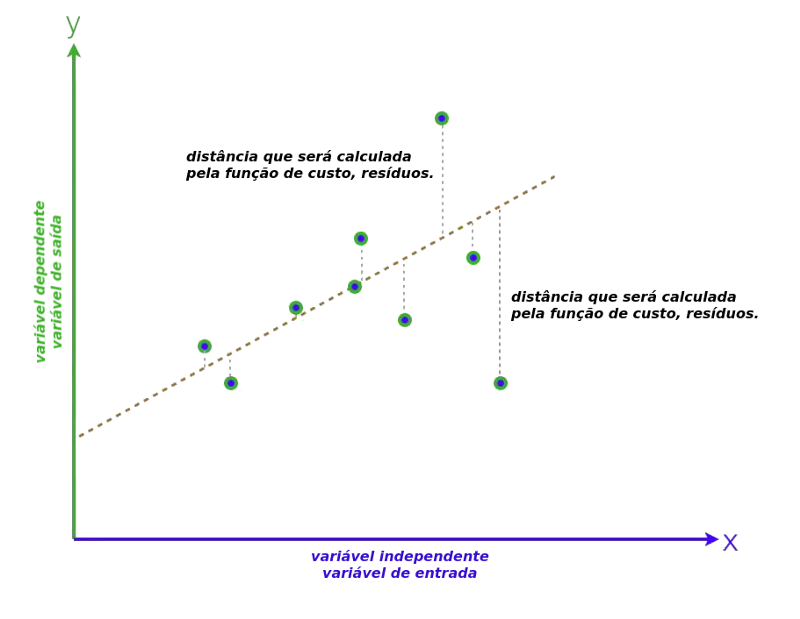

---

Modelos de regressão Linear são muitas vezes ajustados por meio da técnica dos mínimos quadrados que consiste em buscar o melhor ajuste para um conjunto de dados por meio da minimização da soma dos quadrados das diferenças entre o valor estimado e os dados observados, diferença essa chamada de resíduo. A ideia por trás dessa técnica é que, minimizando a soma do quadrado dos resíduos, encontraremos ‘m’ e ‘c’  que trarão a menor diferença entre a previsão de Y  e o Y realmente observado.



---


Para uma função com mais de uma variável dependente usamos a tática de múltipla regressão linear que consiste em um modelo onde a regressão linear segue a equação:

Y=m1X1 +m2X2+ .... mnXn +C

Sendo X1,X2,…,Xn as variáveis independentes e Y a variável dependente. Os coeficientes m1,m2,...,mn e C são encontrados da maneira semelhante a usada na regressão linear simples.



---


Com os Datasets de treino conseguimos encontrar os coeficientes ‘m’ e ‘c’, que nos permitem, com os Datasets de teste, testar nossa regressão linear. Comparamos o Y previsto com o Y esperado por meio do coeficiente de determinação R2 ou R-squared. R2 é uma medida que nos mostra o quão próximo os dados estão ajustados na linha de regressão, variando de 0 a 1 onde 1 é o mais ajustado possível com os dados previstos e esperados idênticos.

A definição do R-quadrado é bastante simples: é a porcentagem da variação da variável resposta que é explicada por um modelo linear ou:

R2=variação explicado/Variação Total 


---


Para testarmos a Regressão Linear utilizaremos um Dataset de empresas com dados a respeito do dinheiro gasto em 3 setores e o lucro da empresa. Assim podemos executar uma múltipla regressão linear a fim de prever o lucro da empresa com base nos investimentos em cada um dos 3 setores.

---



In [33]:
#Dataset usado pré processado

DF

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.800,471784.1000,0,192261.83000
1,1,162597.70,151377.590,443898.5300,1,191792.06000
2,2,153441.51,101145.550,407934.5400,2,191050.39000
3,3,144372.41,118671.850,383199.6200,0,182901.99000
4,4,142107.34,91391.770,366168.4200,2,166187.94000
...,...,...,...,...,...,...
994,995,54135.00,118451.999,173232.6695,1,95279.96251
995,996,134970.00,130390.080,329204.0228,1,164336.60550
996,997,100275.47,241926.310,227142.8200,1,413956.48000
997,998,128456.23,321652.140,281692.3200,1,333962.19000


In [34]:
#separar a coluna de profit em "Y"(Variável dependente) e os outros dados em "X"(variável independente)



x=DF.iloc[:,:-1]
y=DF.iloc[:,-1]




print(x)
print(y)

     index  R&D Spend  Administration  Marketing Spend  State
0        0  165349.20      136897.800      471784.1000      0
1        1  162597.70      151377.590      443898.5300      1
2        2  153441.51      101145.550      407934.5400      2
3        3  144372.41      118671.850      383199.6200      0
4        4  142107.34       91391.770      366168.4200      2
..     ...        ...             ...              ...    ...
994    995   54135.00      118451.999      173232.6695      1
995    996  134970.00      130390.080      329204.0228      1
996    997  100275.47      241926.310      227142.8200      1
997    998  128456.23      321652.140      281692.3200      1
998    999  161181.72      270939.860      295442.1700      0

[999 rows x 5 columns]
0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
994     95279.96251
995    164336.60550
996    413956.48000
997    333962.19000
998    476485.43000
Name: Profit

In [35]:
#separando o Dataset em Dataset de treino e Dataset de teste

x_train, x_test, y_train, y_test= ms.train_test_split(x,y,test_size= 0.2, random_state=4)

In [36]:
#Executando a regressão linear com os Datasets de Treino 

regressor=lm.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
#coeficientes 'm' da regressão linear achados.

regressor.coef_

array([ 2.27760754e+00,  5.48442805e-01,  1.06008341e+00,  8.12583073e-02,
       -3.05956944e+02])

In [38]:
#testando por meio do r2 score a viabilidade da regressão linear comparando o Y previsto e Y esperado.

y_prev=regressor.predict(x_test)

r2_score(y_test,y_prev)



0.9841033642583694

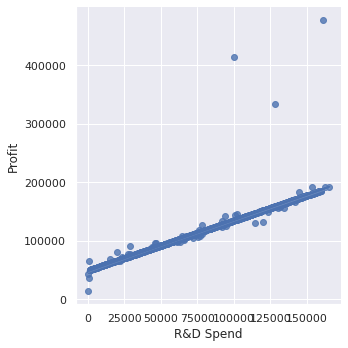

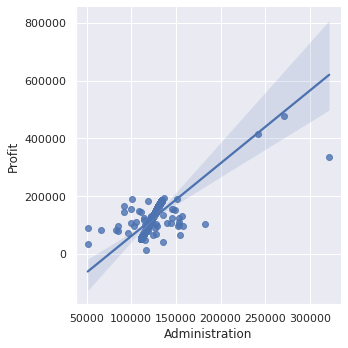

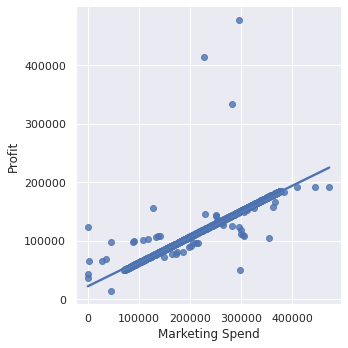

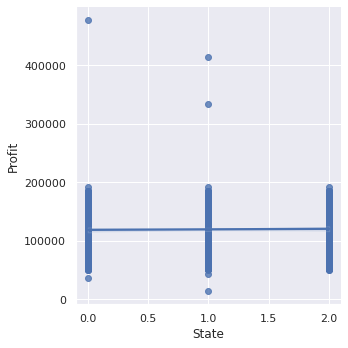

In [39]:
#plotando o gráfico das 3 regress~pes çineares de maneira separada

graf=sns.lmplot(data=DF,x='R&D Spend',y='Profit')
graf=sns.lmplot(data=DF,x='Administration',y='Profit')
graf=sns.lmplot(data=DF,x='Marketing Spend',y='Profit')
graf=sns.lmplot(data=DF,x='State',y='Profit')

In [40]:
print(y_test[0:5])
print(y_prev[0:5])

698     50468.96294
577    128337.62140
762    182979.80610
789    137842.46720
520     70509.78421
Name: Profit, dtype: float64
[ 50339.0827107  129227.46229807 184772.83759326 138688.94191264
  70762.28776123]


Podemos Verificar que nosso modelo de regressão linear representa muito bem a relação entre as variaveis estudads cehgando a um R2 score de 0,984.Confirmamos isso comparando o Y_teste com o Y_prev assim vemos que os valores previstos e esperados estão extremamente próximos.

##**Regressão Logística**



---



Regressão logística é uma técnica que tem como objetivo produzir um modelo que permita a predição de valores tomados por uma variável dependente categórica, frequentemente binário, com base em outras variáveis independentes continuas e/ou binárias. Ela funciona de maneira semelhante a regressão linear.

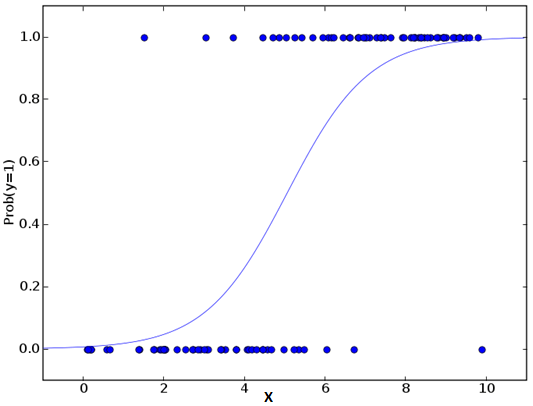


---

Para o Dataset em questão é usada uma regressão logística binária, onde a variável que será prevista é dada de forma binária ,0 ou 1, no caso previsão de casos de Diabetes 0 para não diabético e 1 para diabético.


---

Essa aproximação é feita pelo método da máxima verossimilhança que consiste em estimar os valores para os parâmetros que tornam mínima a função de log-verossimilhança negativa.

---


In [41]:
#DataSet pré processado

Diabetes


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,156.056122,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,156.056122,26.6,0.351,31,0
2,2,8,183.0,64.0,29.145408,156.056122,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,764,2,122.0,70.0,27.000000,156.056122,36.8,0.340,27,0
765,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,766,1,126.0,60.0,29.145408,156.056122,30.1,0.349,47,1


In [42]:
#separa a coluna de Outcmoe em "Y"(Variável dependente) e os outros dados em "X"(variável independente)

x1=Diabetes.iloc[:,:-1].values
y1=Diabetes.iloc[:,-1].values


#separando o Dataset em Dataset de treino e Dataset de teste

x1_train, x1_test, y1_train, y1_test= ms.train_test_split(x1,y1,test_size= 0.5, random_state=4)



In [43]:
#Executando a Regressão logística

classifier=LogisticRegression(max_iter=200)
classifier.fit(x1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200)

In [44]:
#aplicando a Regressão Logística no Dataset de teste

y1_prev=classifier.predict(x1_test)

In [45]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [verdaderiros negativos           Falsos positivos]
#      [falsos  negativos          verdadeiros positivos]


cm=confusion_matrix(y1_test,y1_prev)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()

print(Accuracy)


[[229  27]
 [ 44  84]]
0.8151041666666666


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



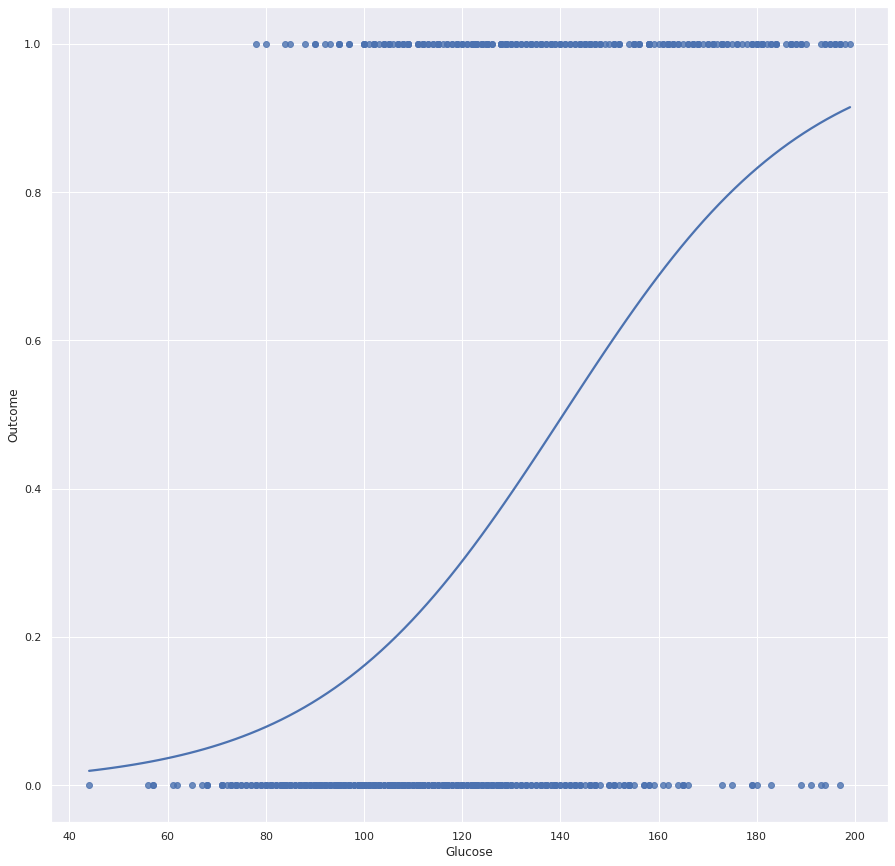

In [46]:
graf=sns.regplot(x='Glucose', y='Outcome', data=Diabetes, logistic=True, ci=None)




---
Podemos plotar o gráfico da regressão logística do parâmetro de Glucose que entre os parâmetros é o que mais se associa com diabetes, e assim conseguimos uma melhor visualização da Regressão Logística em funcionamento. 

---



Podemos verificar que a regressão logística mostrou uma precisão de 80% na previsão dos pacientes mostrando 228 negativos corretamente e 81 positivos corretamente enquanto classificou 75 casos de maneira incorreta.

---



##**PCA**


---


A Análise de Componentes Principais ou PCA (Principal Component Analysis) é uma técnica usada para analisar inter-relações entre um grande número de variáveis (colunas de uma Dataset neste caso) e explicar essas variáveis em termos de suas dimensões inerentes (Componentes).

O objetivo é encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (Principal componentes ou PC) com o mínimo de perda de infromação.Assim por meio da PCA podemos fazer uma redução de dimensionalidade em nosso Dataset.

---
Cada PC contribui com determinado peso para os dados onde os primeiros PCs contem mais informação que os últimos. Assim o primeiro PC é o mais importante enquanto o último o menos importante.

---


Para demontrarmos isso usaremos o mesmo Dataset usado na regressão logística, minimizando suas variaveis enquanto mantemos mais de 90% da informação. 


In [47]:
#DataSet


Diabetes

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,156.056122,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,156.056122,26.6,0.351,31,0
2,2,8,183.0,64.0,29.145408,156.056122,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,764,2,122.0,70.0,27.000000,156.056122,36.8,0.340,27,0
765,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,766,1,126.0,60.0,29.145408,156.056122,30.1,0.349,47,1


In [48]:
#Separando o Outcome do restante das colunas

x1c=Diabetes.iloc[:,:-1].values
y1c=Diabetes.iloc[:,-1].values


x1c=scale(x1c)




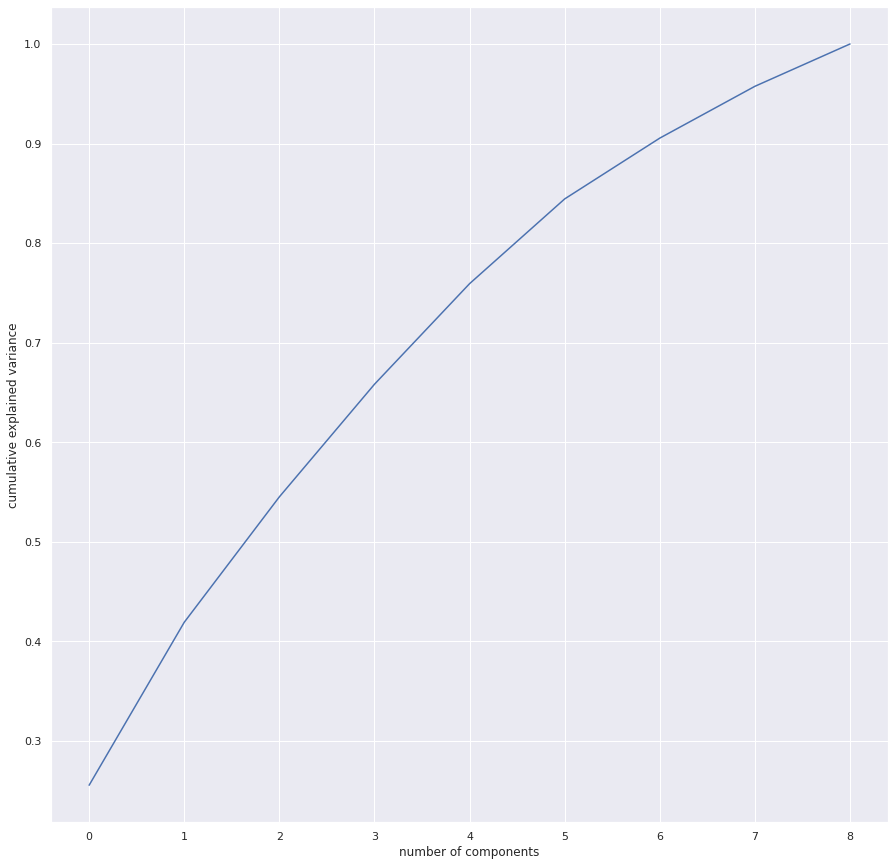

In [49]:
#verificar pelo gráfico quantas PC serão nescessarias afim de manter a porcentagem dos dados desejada, o escolhido foi acima de 90%

pca = PCA().fit(x1c)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
#Aplicando o PCA

pca=decomposition.PCA(n_components=6)
pca.fit(x1c)

PCA(n_components=6)

In [51]:
#Verificando os valores encontrados para os PCs

pcas=pca.transform(x1c)

pca_DF=pd.DataFrame(pcas,columns=['PC1','PC2','PC3','PC4','PC5','PC6',])
pca_DF

y1c=pd.DataFrame(y1c,columns=['Outcome'])

dia_DF=pd.concat([pca_DF,y1c],axis=1)

dia_DF

,PC1,PC2,PC3,PC4,PC5,PC6,Outcome
0,1.507143,-0.605272,0.574159,1.709707,-0.173312,-0.294547,1
1,-1.433902,0.058171,0.254352,1.449528,-0.870727,-0.088185,0
2,0.495544,-0.834847,1.998242,1.388574,-0.215220,-0.305371,1
3,-2.210587,0.099219,-0.116541,1.362772,-1.244739,0.329822,0
4,0.552124,3.441759,2.499305,3.149832,3.683057,-1.092878,1
...,...,...,...,...,...,...,...
763,2.209706,-1.800795,-1.748760,-1.200477,0.375545,-2.052262,0
764,-0.354213,0.702308,-0.504971,-1.684726,0.198505,-0.049813,0
765,-0.917665,-0.937023,-0.338099,-1.697901,0.357996,0.024165,0
766,-0.314989,-0.216601,0.115858,-1.742877,0.534970,-0.764189,1


In [52]:
#mostrando o loanding value(valor do quanto cada coluna contibui para cada PC)

loading=pca.components_.T
loaading_df=pd.DataFrame(loading,columns=['PC1','PC2','PC3','PC4','PC5','PC6'],index=Diabetes.iloc[:,:-1].columns)
loaading_df

,PC1,PC2,PC3,PC4,PC5,PC6
index,-0.000226,0.009817,-0.211227,-0.882727,0.399630,-0.106817
Pregnancies,0.308635,-0.551864,-0.074627,0.149695,0.105964,-0.374622
Glucose,0.420802,0.067669,0.434383,-0.192406,-0.132191,0.175622
BloodPressure,0.379242,-0.137813,-0.323954,-0.040284,-0.059503,0.769757
SkinThickness,0.390079,0.348800,-0.357928,0.078175,-0.058728,-0.424109
Insulin,0.320534,0.151254,0.570774,-0.233991,-0.285805,-0.140197
BMI,0.390197,0.439123,-0.335052,0.097797,-0.060440,-0.051042
DiabetesPedigreeFunction,0.146680,0.270196,0.299584,0.297138,0.833648,0.117626
Age,0.393920,-0.511277,0.016535,0.031999,0.155873,-0.094416


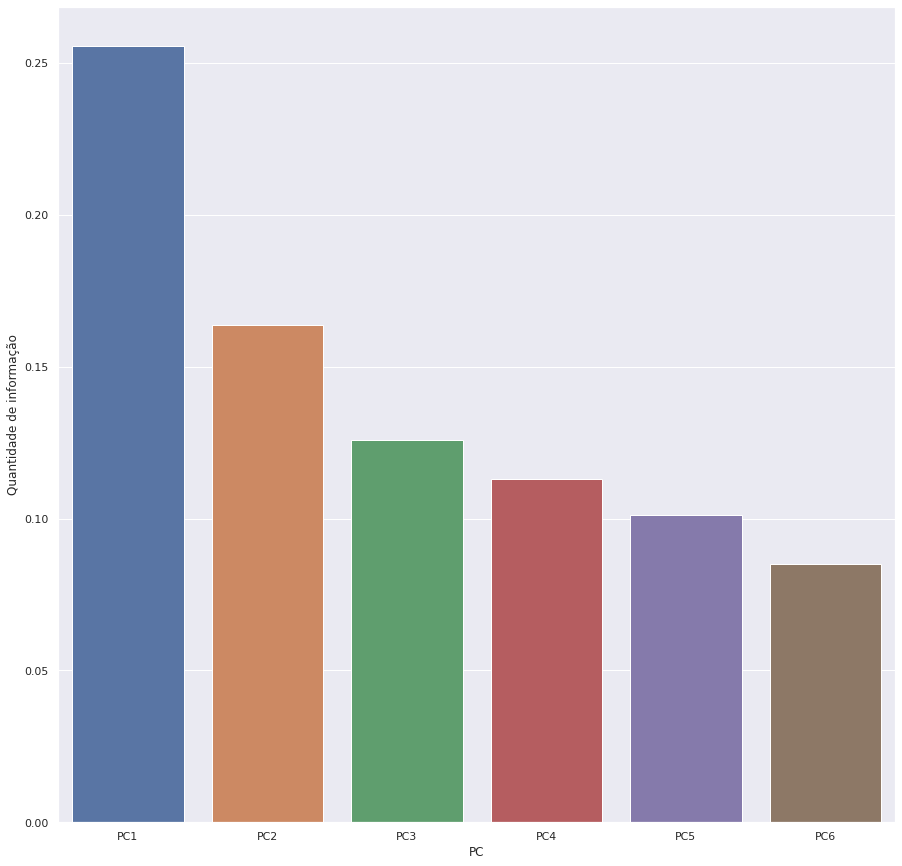

In [53]:
#Mostrando a quantidade de informação contida em cada PC

variance=pca.explained_variance_ratio_
variance

variance_df=pd.DataFrame(variance,columns=['Quantidade de informação'])
variance_df['PC']=['PC1','PC2','PC3','PC4','PC5','PC6']
variance_df

sns.barplot(x=variance_df['PC'],y=variance_df['Quantidade de informação'])

In [64]:
dia_3d=dia_DF

fig=px.scatter_3d(dia_3d,x='PC1',y='PC2',z='PC3',color='Outcome',symbol='Outcome')
fig.show()

dia_3d=dia_DF

fig=px.scatter_3d(dia_3d,x='PC4',y='PC5',z='PC6',color='Outcome',symbol='Outcome')
fig.show()



---



Assim conseguimos reduzir o numero de atributos de 9 para 6 por meio da PCA e mostra o peso de cada PC e a contribuição de cada atributo para cada PC.

---



##**Clustering(k-means)**



---



Um agrupamento K-means é uma técnica usada para segregar em terno de um número K de centros em um grupo de dados formando assim um número K de agrupamentos. Essa tática é usada em Datasets onde seus dados estão organizados em grupos, como grupos de clientes com gostos parecidos ou pacientes com sintomas similares.

O processo para agrupamento de dados se baseia no conceito de similaridade, ou seja, seu objetivo é encontrar itens semelhantes de acordo com seus atributos. Seu calculo se baseia na distancia entre os dados tentando sempre minimizar a distancia de cada dado ao centro do grupo a cada iteração.


---
Para testarmos o K-means clustering utilizaremos um DataSet sobre o diagnostico de Cancer de Mama de acordo com os dados a respeito do tumor assim julgando entre benigno e maligno 


---



In [55]:
#Dataset

DFK=cancer
DFK

,index,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


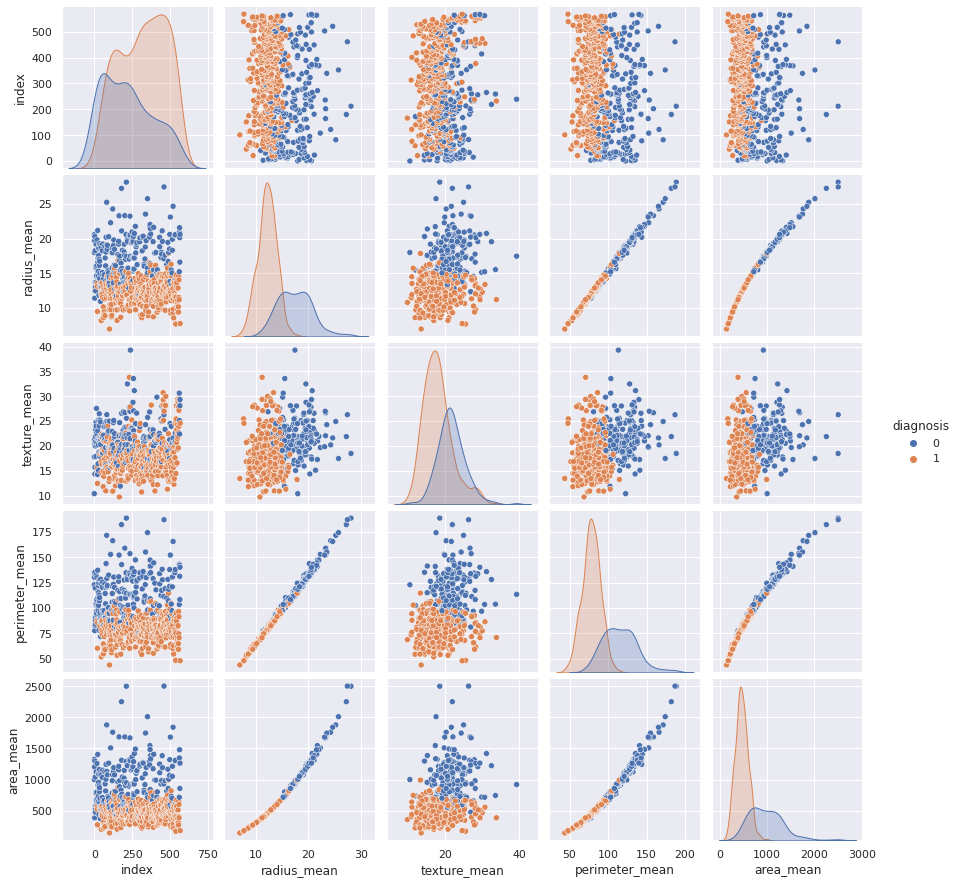

In [56]:
#vizualização da distribuição dos dados de acordo com cada um dos seus 6 primeiros atributos afim de melhor se vizualizar os grupos.

sns.pairplot(DFK.iloc[:,0:6],hue='diagnosis')


In [57]:
#Retirar a coluna de Diagnostico e aplicar o K-means clustering

xk=DFK.iloc[:,1:]



kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(xk)

xk

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [58]:
#dsitribuição das labels atribuidas

kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [63]:
#testando a acuracia do clustering

colum=pd.DataFrame(kmeans.labels_,columns=['classes Kmeans'])
#DFK=pd.concat([colum,DFK],axis=1)



DFK
correto=0
incorreto=0

coluna=DFK.diagnosis.replace([1,0],[0,1])
DFK.diagnosis=coluna
for i in range(392):
  
  if DFK['diagnosis'][i] == DFK['classes Kmeans'][i]:
    correto=correto+1
  else:
    incorreto +=1

print('Acurácia: %f' %(correto/(correto+incorreto)))

Acurácia: 0.821429


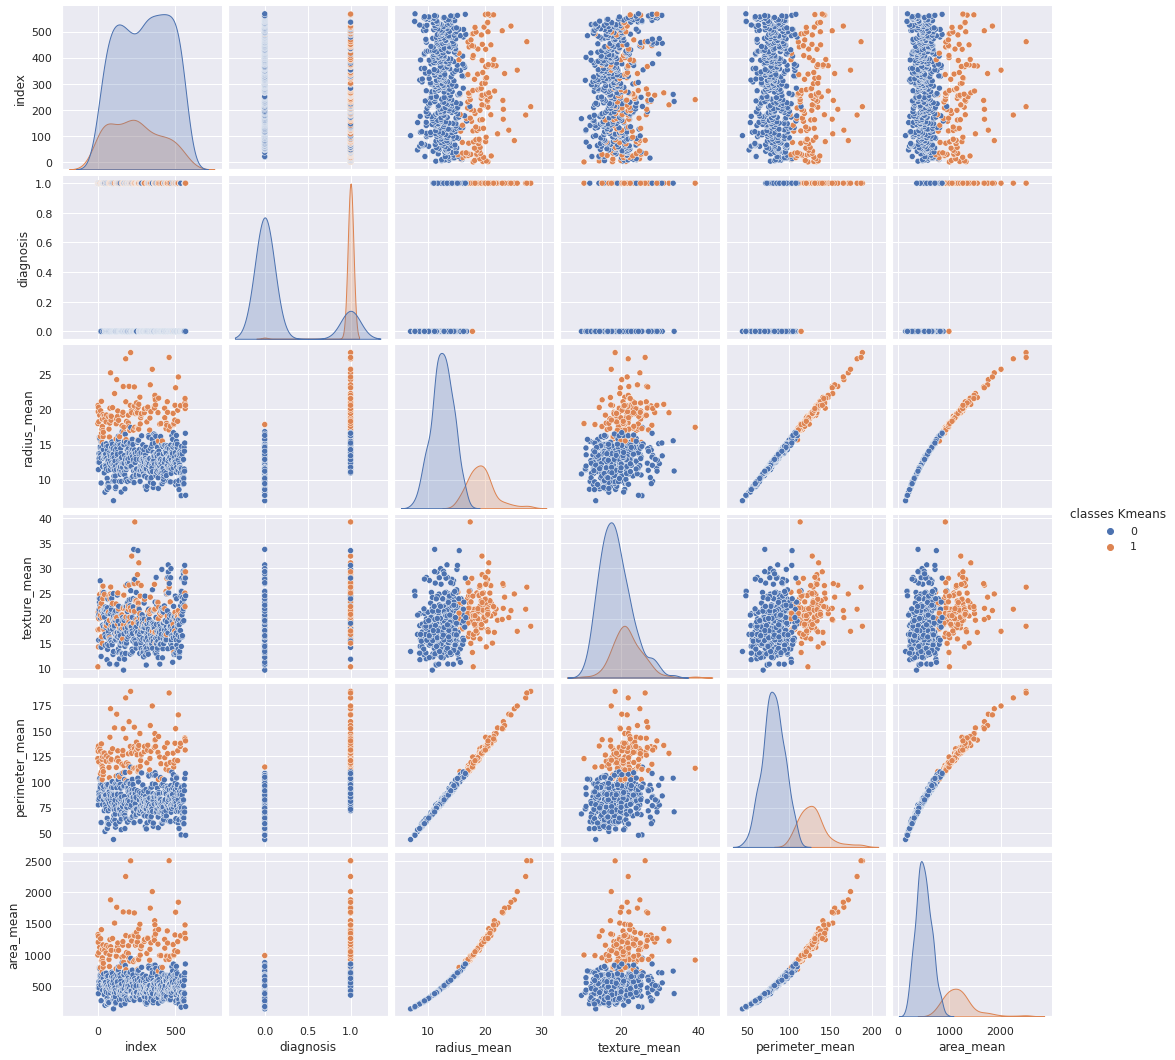

In [60]:
#vizualização da distribuição dos dados de acordo com cada um dos seus 6 primeiros atributos afim de comparar a classificação com o verdadeiro diagnóstico.

sns.pairplot(DFK.iloc[:,0:7],hue='classes Kmeans')




---




Assim conseguimos uma acurácia de 82% usando um modelo de clustering k-means, mostrando o correto funcionamento da técnica do K-means clustering.


---

